In [43]:
#Quantum
import qiskit
import qiskit.providers.aer as aer

<br>
$\large a+b i \qquad \qquad a, b \in \mathbb{R} \qquad \qquad 1^2= -1 \qquad \qquad \mathrm{e.g.} -2.0 + 5.0 i$

In [3]:
#Plotting.
import matplotlib.pyplot as plt
#Numerical
import numpy as np
#random numbers
import random
plt.style.use('ggplot')

In [4]:
plt.rcParams['figure.figsize'] =(20,10)
plt.style.use('seaborn-whitegrid')

In [5]:
1.0j * 1.0j

(-1+0j)

In [6]:
x = -2.0 + 5.0j
x

(-2+5j)

In [7]:
x**2

(-21-20j)

In [8]:
y=3.0+1.5j
y

(3+1.5j)

In [9]:
x+y

(1+6.5j)

In [10]:
x*y

(-13.5+12j)

In [11]:
x = [-2.0, 5.0]
y = [3.0, 1.5]

In [12]:
x

[-2.0, 5.0]

In [13]:
y

[3.0, 1.5]

In [14]:
def add(u, v):
        return [u[0] + v[0], u[1] + v[1]]

In [15]:
add(x, y)

[1.0, 6.5]

In [16]:
def mult(u, v):
    return [u[0] * v[0], u[1] * v[1]]

In [17]:
mult(x, y)

[-6.0, 7.5]

In [18]:
def proMult(u, v):
    a, b = u
    c, d = v
    return [(a*c) - (b*d), (b*c) + (a*d)]

In [19]:
proMult(x, y)

[-13.5, 12.0]

In [20]:
# A function that returns a function.
class quadratic:
    def __init__(self, a, b, c):
        self.a = a
        self.b = b
        self.c = c
        
    def __call__(self, x):
        return self.a + x**2 + self.b * x + self.c


In [21]:
p = quadratic(a=1.0, b=-5.0, c=6.0)

In [22]:
p(1.0)

3.0

In [23]:
x = np.linspace(0.0, 5.0, 1000)

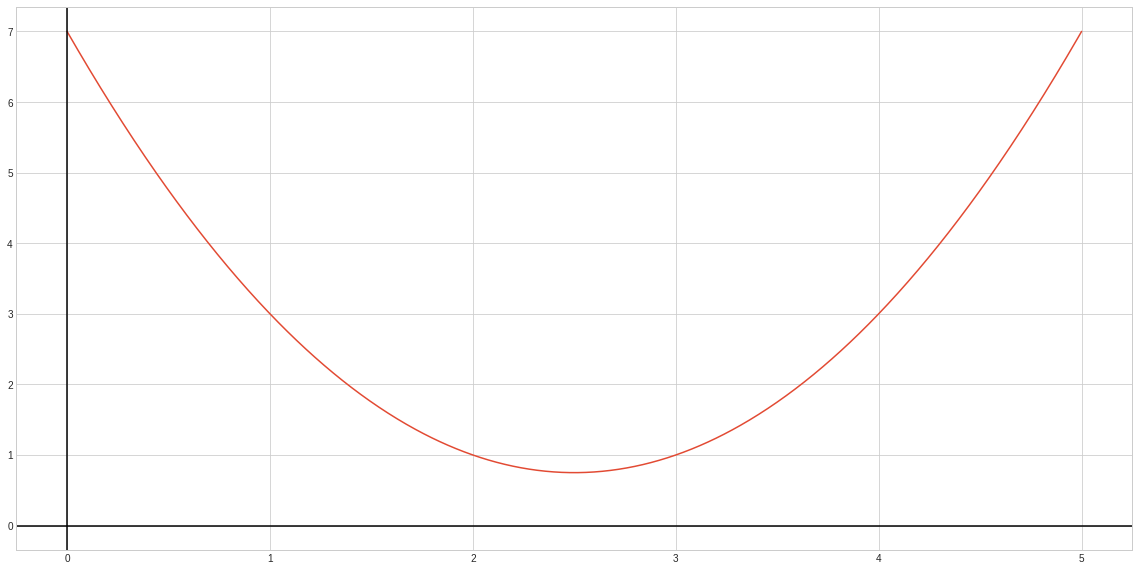

In [24]:
fig, ax = plt.subplots()
ax.plot(x, p(x))
ax.axhline(y=0, color='k')
ax.axvline(x=0, color='k')

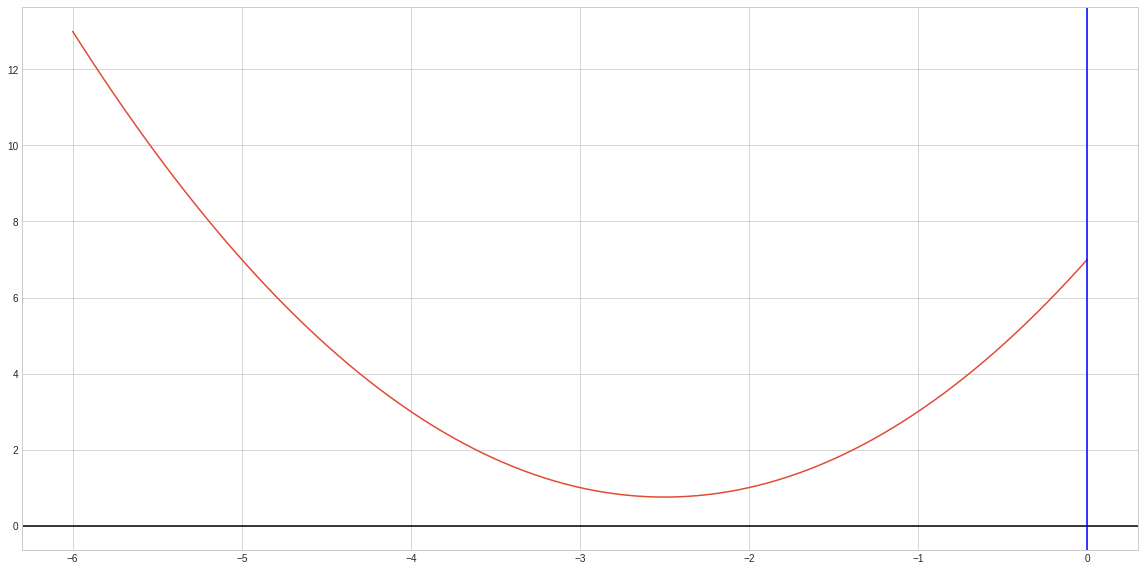

In [25]:
p = quadratic(a=1.0, b=5.0, c=6.0)
x = np.linspace(0.0, -6.0, 100)
fig, ax = plt.subplots()
ax.plot(x, p(x))
ax.axhline(y=0, color='k')
ax.axvline(x=0, color='b')

In [26]:
plt.style.use('ggplot')

<h2>Preliminaries

<h4>Qubits


<h1>Deutsch's Algorithm with Random Function</h1>
<h3> quantum computing</h3>


In [27]:
#Allowing a random constant/function to be added into circuit
def random_f():
    f_number = random.randint(1, 4)
    circuit = qiskit.QuantumCircuit(2,1)
    #constant 0 function
    if f_number == 1:
        circuit.i(1)
    #constant 1 function
    elif f_number == 2:
        circuit.x(1)
    #balanced idenity constant
    elif f_number == 3:
        circuit.cnot(0, 1)
    #balanced not constant
    elif f_number == 4:
        circuit.cnot(0, 1)
        circuit.x(1)
    else:
        print("erroe")
    return circuit

Create first part of circuit

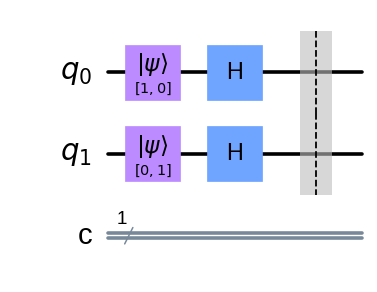

In [54]:
#Create the first part in the circuit
circuit = qiskit.QuantumCircuit(2,1)
circuit.initialize([1, 0],0)
circuit.initialize([0, 1],1)
circuit.h((0, 1))
circuit.barrier()
circuit.draw(output='mpl', scale=1.8)

Create Second part of circuit

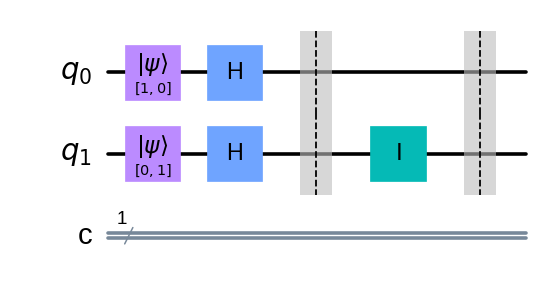

In [55]:
#Calls the random and adds it to the circuit
circuit.compose(random_f(), inplace=True)
circuit.barrier()
circuit.draw(output='mpl', scale=1.8)

Create third part of circuit

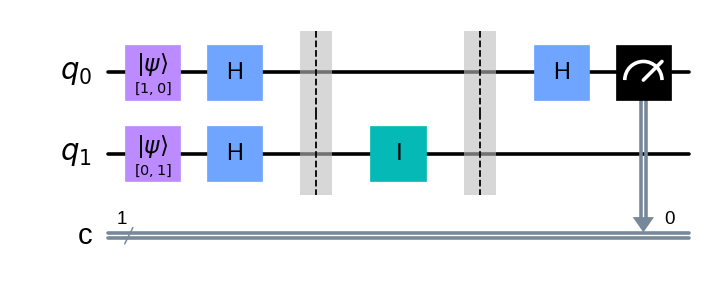

In [56]:
#add a final part and end to the circuit
circuit.h(0)
circuit.measure(0,0)
circuit.draw(output='mpl', scale=1.8)

<h2> Simulate and Decide

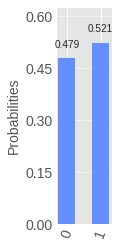

In [53]:
#allows the circuit to be ran several times in order to show p
circuit.compose(random_f(), inplace=True)
circuit.barrier()
circuit.h(0)
circuit.measure(0,0)
simulator =aer.QasmSimulator()
compcircuit = qiskit.transpile(circuit, simulator)
job = simulator.run(compcircuit, shorts=100)
results = job.result()
counts = results.get_counts()
#prints out a visual graph of the circuit show the probabilities of get a 0 or 1
qiskit.visualization.plot_histogram(counts, figsize=(1,4))